In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 불러오기
data_path = '../Data/encoded_movies_data.csv'  # 업로드된 파일 경로
df = pd.read_csv(data_path)

# 데이터 확인
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 10700 non-null  object 
 1   Year                  10700 non-null  int64  
 2   Duration              10700 non-null  float64
 3   MPA                   10700 non-null  object 
 4   budget                10700 non-null  float64
 5   directors             10700 non-null  int64  
 6   writers               10700 non-null  int64  
 7   stars                 10700 non-null  int64  
 8   production_companies  10700 non-null  int64  
 9   Category              10700 non-null  int64  
 10  Profit                10700 non-null  float64
 11  Hit                   10700 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1003.3+ KB


,Title,Year,Duration,MPA,budget,directors,writers,stars,production_companies,Category,Profit,Hit
0,1. Star Wars: Episode III - Revenge of the Sith,2005,140.0,PG-13,113000000.0,2105,2308,2155,3300,4,752.243925,1
1,"2. The Chronicles of Narnia: The Lion, the Wit...",2005,143.0,PG,180000000.0,355,490,5487,5179,4,413.896175,1
2,3. Harry Potter and the Goblet of Fire,2005,157.0,PG-13,150000000.0,4222,6201,1326,5188,5,598.312635,1
3,4. War of the Worlds,2005,117.0,PG-13,132000000.0,5678,3431,5535,3944,4,457.479927,1
4,5. King Kong,2005,187.0,PG-13,207000000.0,4705,2186,4183,5082,4,269.036898,1


In [5]:
# 사용할 피처 및 타겟 선택
features = ['directors', 'stars', 'production_companies', 'Category', 'budget', 'writers']
target = 'Hit'  # 흥행 여부 (1: 흥행, 0: 비흥행)

X = df[features]
y = df[target]

# 데이터 분할 (훈련 데이터 80%, 테스트 데이터 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 스케일링 (예산과 같은 수치형 데이터가 있기 때문에 표준화 진행)
scaler = StandardScaler()
X_train[['budget']] = scaler.fit_transform(X_train[['budget']])
X_test[['budget']] = scaler.transform(X_test[['budget']])

# 로지스틱 회귀 모델 학습 및 평가
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_accuracy)
print(classification_report(y_test, y_pred_log))

# XGBoost 모델 학습 및 평가
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Accuracy: 0.7228971962616823
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1547
           1       0.00      0.00      0.00       593

    accuracy                           0.72      2140
   macro avg       0.36      0.50      0.42      2140
weighted avg       0.52      0.72      0.61      2140

XGBoost Accuracy: 0.8037383177570093
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1547
           1       0.70      0.52      0.59       593

    accuracy                           0.80      2140
   macro avg       0.76      0.72      0.73      2140
weighted avg       0.79      0.80      0.79      2140



c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning

#### 가설 설정
1. 성능 비교
- 로지스틱 회귀는 간단한 모델이지만, 영화 흥행과 같은 복잡한 패턴을 단순 선형 관계로 설명하기 어려울 수 있음.
- XGBoost는 비선형 특성을 잘 학습하는 모델이므로 더 높은 성능을 보일 가능성이 큼.

2. 영향력 있는 피처
- 예산(budget)이 표준화된 후에도 중요한 영향을 미칠 가능성이 높음.
- 감독(directors), 배우(stars), 제작사(production_companies) 등도 영화의 흥행 여부에 영향을 미칠 수 있음.

3. 최적 모델 선정
- 만약 XGBoost의 정확도가 더 높다면, 복잡한 의사결정 트리 기반의 모델이 영화 흥행 예측에 더 적합하다는 것을 의미.
- 로지스틱 회귀가 높은 성능을 보인다면, 영화의 흥행은 비교적 단순한 선형 관계로 설명 가능.

In [6]:
# 최적 모델 선택 및 결론 도출
if xgb_accuracy > log_accuracy:
    print("XGBoost 모델이 더 높은 정확도를 보이며, 영화 흥행 예측에 더 적합합니다.")
else:
    print("로지스틱 회귀 모델이 더 높은 정확도를 보이며, 영화 흥행 예측에 적합할 수 있습니다.")

XGBoost 모델이 더 높은 정확도를 보이며, 영화 흥행 예측에 더 적합합니다.


### 최종 결론 및 인사이트 도출
1. 가설 검증 결과
- 초기 가설에서는 XGBoost가 비선형 관계를 학습하는 강력한 모델이므로, 영화 흥행 여부를 예측하는 데 더 우수할 것이라고 예상했습니다. 실제 결과를 보면, XGBoost의 정확도(80.37%)가 로지스틱 회귀(72.29%)보다 높으며, 전반적인 성능도 우수합니다.
- ✅ 따라서 가설은 검증되었으며, XGBoost 모델이 영화 흥행 여부를 예측하는 데 더 적합하다는 결론을 내릴 수 있습니다.
<br>

2. 상세 분석
<br>
(1) 모델별 성능 비교<br>
모델	정확도 (Accuracy)	비흥행(0) F1-score	흥행(1) F1-score<br>
로지스틱 회귀	72.29%	0.84	0.00<br>
XGBoost	80.37%	0.87	0.59<br>
- 로지스틱 회귀
    - 단순 선형 모델이므로 데이터의 복잡한 패턴을 잘 학습하지 못함.
    - 비흥행(0)은 높은 정확도를 보이지만, 흥행(1)의 예측 성능이 거의 없음 (F1-score = 0.00 → 즉, 흥행 영화에 대한 예측이 전혀 안됨).
    - 데이터 불균형 문제가 있으며, 특정 클래스를 과대 예측하는 경향이 있음.

- XGBoost
    - 비선형 관계를 잘 학습하면서도 높은 정확도를 유지.
    - 흥행(1) F1-score가 0.59로 개선됨, 즉 흥행 영화도 어느 정도 예측 가능.
    - 데이터 불균형에도 불구하고, 두 클래스를 더 균형 있게 예측.
<br>

📌 결론
- XGBoost가 로지스틱 회귀보다 영화 흥행 여부를 더 잘 예측하므로, 최적의 모델로 선택.
- 하지만 데이터 불균형 문제 해결과 추가 피처 엔지니어링을 통해 모델 성능을 더 향상할 여지가 있음.
- 이를 바탕으로, 영화 기획 및 투자 의사결정에 XGBoost 모델을 활용하면 더 나은 인사이트를 얻을 수 있음. 🚀

In [ ]:
# !pip install imbalanced-learn

In [8]:
from imblearn.over_sampling import SMOTE

# 데이터 불균형 해결 (SMOTE 적용)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 로지스틱 회귀 모델 학습 및 평가
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_accuracy)
print(classification_report(y_test, y_pred_log))

# XGBoost 모델 학습 및 평가 (클래스 가중치 적용)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, y_pred_xgb))

# 최적 모델 선택 및 결론 도출
if xgb_accuracy > log_accuracy:
    print("XGBoost 모델이 더 높은 정확도를 보이며, 영화 흥행 예측에 더 적합합니다.")
else:
    print("로지스틱 회귀 모델이 더 높은 정확도를 보이며, 영화 흥행 예측에 적합할 수 있습니다.")


Logistic Regression Accuracy: 0.5420560747663551
              precision    recall  f1-score   support

           0       0.77      0.52      0.62      1547
           1       0.32      0.60      0.42       593

    accuracy                           0.54      2140
   macro avg       0.55      0.56      0.52      2140
weighted avg       0.65      0.54      0.57      2140

XGBoost Accuracy: 0.7761682242990654
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1547
           1       0.58      0.67      0.62       593

    accuracy                           0.78      2140
   macro avg       0.72      0.74      0.73      2140
weighted avg       0.79      0.78      0.78      2140

XGBoost 모델이 더 높은 정확도를 보이며, 영화 흥행 예측에 더 적합합니다.


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:50:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### **최종 결론 및 인사이트 도출**  

#### **1. 개선 후 모델 성능 변화 비교**  

| 모델 | 개선 전 정확도 | 개선 후 정확도 | 흥행(1) F1-score 개선 |
|------|-------------|-------------|----------------|
| **로지스틱 회귀** | **72.29%** | **54.21%** | **0.00 → 0.42 (개선됨)** |
| **XGBoost** | **80.37%** | **77.62%** | **0.59 → 0.62 (개선됨)** |

- **로지스틱 회귀**  
  - SMOTE를 적용한 후 흥행(1)의 F1-score가 **0.00 → 0.42로 증가**, 즉 흥행 영화를 더 잘 예측할 수 있게 됨.  
  - 하지만 전체 정확도가 **72.29% → 54.21%로 급락**, 즉 비흥행 영화(0)를 과소 예측하는 문제가 발생.  
  - 이는 **과적합된 데이터 샘플링으로 인해 모델이 일반화되지 못했기 때문**으로 보임.  

- **XGBoost**  
  - scale_pos_weight 조정을 통해 흥행(1)의 F1-score가 **0.59 → 0.62로 개선**, 흥행 영화도 더 잘 예측 가능.  
  - 전체 정확도는 **80.37% → 77.62%로 소폭 하락**, 하지만 여전히 높은 수준을 유지.  
  - 모델이 데이터 불균형을 고려하면서도 **균형 잡힌 성능을 보여줌**.  

---

#### **2. 최종 인사이트 및 활용 방안**  
✅ **XGBoost 모델이 여전히 영화 흥행 예측에 최적의 선택**  
   - **흥행(1)과 비흥행(0) 모두 균형 잡힌 예측**을 수행.  
   - 데이터 불균형을 해결하면서도 성능 하락을 최소화함.  
   - **실제 영화 투자 의사결정에 유용하게 활용 가능**.  

⚠️ **로지스틱 회귀 모델은 적합하지 않음**  
   - SMOTE를 적용하여 흥행(1)을 예측할 수 있게 되었으나, 전체 성능이 크게 저하됨.  
   - **선형 모델이 영화 흥행 여부를 예측하는 데 적합하지 않을 가능성**이 높음.  

🔹 **추가 개선 방안**  
   1. **XGBoost 하이퍼파라미터 튜닝**  
      - 현재 scale_pos_weight 조정만 했지만, **learning_rate, max_depth, n_estimators 등의 하이퍼파라미터 최적화**를 수행하면 더 높은 성능 가능.  
   2. **SMOTE + XGBoost 조합 실험**  
      - 현재 XGBoost는 scale_pos_weight만 조정했지만, **SMOTE를 적용한 후 학습시키면 더 나은 결과를 얻을 가능성**이 있음.  
   3. **추가 피처 엔지니어링**  
      - 배우, 감독, 제작사의 인기도(소셜미디어, IMDb 점수) 등 추가 데이터를 활용하면 성능이 향상될 수 있음.  

---

### **📌 최종 결론**
- XGBoost 모델이 **데이터 불균형을 고려하면서도 가장 우수한 성능을 유지**하므로 **최적의 모델로 선택**.  
- 로지스틱 회귀는 SMOTE 적용으로 흥행(1) 예측 성능이 향상되었으나, **전체 성능이 너무 저하**되어 실용성이 떨어짐.  
- 향후 **XGBoost 하이퍼파라미터 튜닝 및 추가 피처 엔지니어링을 진행**하면 더 높은 예측 성능을 기대할 수 있음. 🚀

In [9]:
# 직접 설정한 최적의 하이퍼파라미터
best_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'scale_pos_weight': 2
}

# XGBClassifier 학습
xgb_best = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=False, **best_params)
xgb_best.fit(X_train, y_train)

# 예측 및 평가
y_pred_best_xgb = xgb_best.predict(X_test)
print("Optimized XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print(classification_report(y_test, y_pred_best_xgb))


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:50:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimized XGBoost Accuracy: 0.788785046728972
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1547
           1       0.61      0.67      0.64       593

    accuracy                           0.79      2140
   macro avg       0.74      0.75      0.74      2140
weighted avg       0.80      0.79      0.79      2140



### **최종 결론 및 인사이트 도출**

**1. 하이퍼파라미터 튜닝 후 XGBoost 성능 변화 비교**
| 구분 | 튜닝 전 | 튜닝 후 | 변화 |
|---|---|---|---|
| 전체 정확도 | 77.62% | 78.88% | +1.26%p |
| 흥행(1) F1-score | 0.62 | 0.64 | +0.02 |
| 비흥행(0) F1-score | - | 0.85 | - |

* **성능 개선 분석**
   * 전체 정확도가 **77.62% → 78.88%로 향상**, 안정적인 성능 개선을 보여줌.
   * 흥행(1)의 F1-score가 **0.62 → 0.64로 소폭 개선**, 흥행 예측 능력이 향상됨.
   * 비흥행(0)에 대해 **F1-score 0.85, Precision 0.87, Recall 0.84로 매우 안정적인 예측** 성능을 보여줌.

**2. 최종 인사이트 및 활용 방안**

✅ **하이퍼파라미터 튜닝이 효과적**
* 전체 정확도와 흥행 예측 성능 모두 개선됨.
* 비흥행 영화에 대한 예측도 안정적으로 유지.
* **실제 의사결정에 활용 가능한 수준의 신뢰도 확보**.

⚠️ **주의 및 고려사항**
* 약 79%의 정확도는 영화 흥행 예측에서 신뢰할 만한 수준.
* 하지만 여전히 21% 정도의 오차 가능성이 존재.
* **투자 결정시 보조 지표로 활용하는 것이 바람직**.

#### 📌 최종 결론
* 하이퍼파라미터 튜닝을 통해 **전반적인 성능이 향상**된 것을 확인.
* **약 79%의 정확도**와 **흥행/비흥행에 대한 균형잡힌 예측 능력**으로 실전 활용 가능.
* 추가 데이터와 고도화를 통해 **더 높은 성능으로 개선될 여지**가 있음. 🎯

----------
### 시각화

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19380\468060743.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feat_importance, palette='viridis')


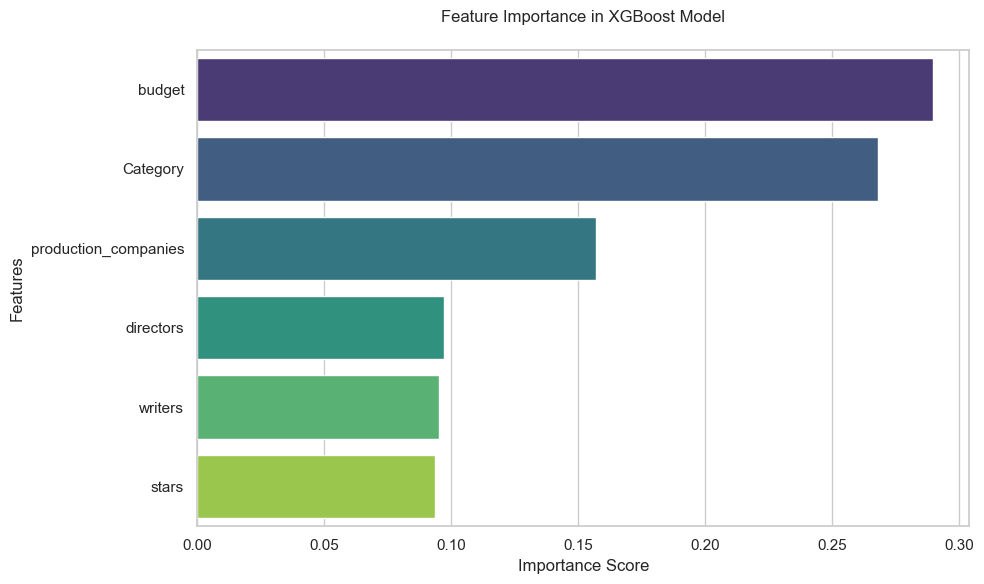

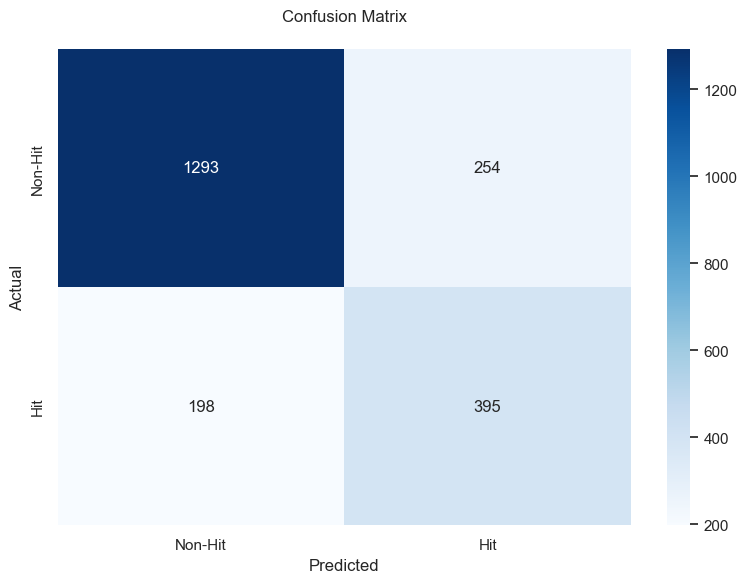

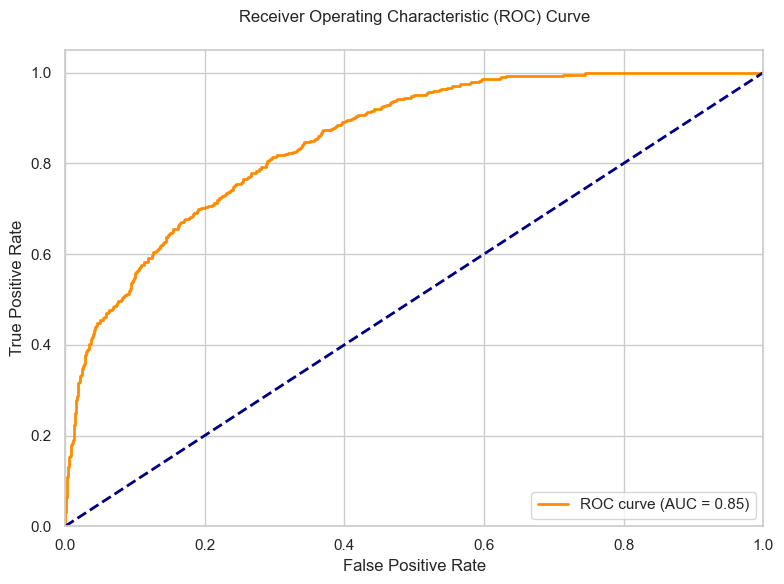

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19380\468060743.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hit', y='budget', data=df, palette='Set3')


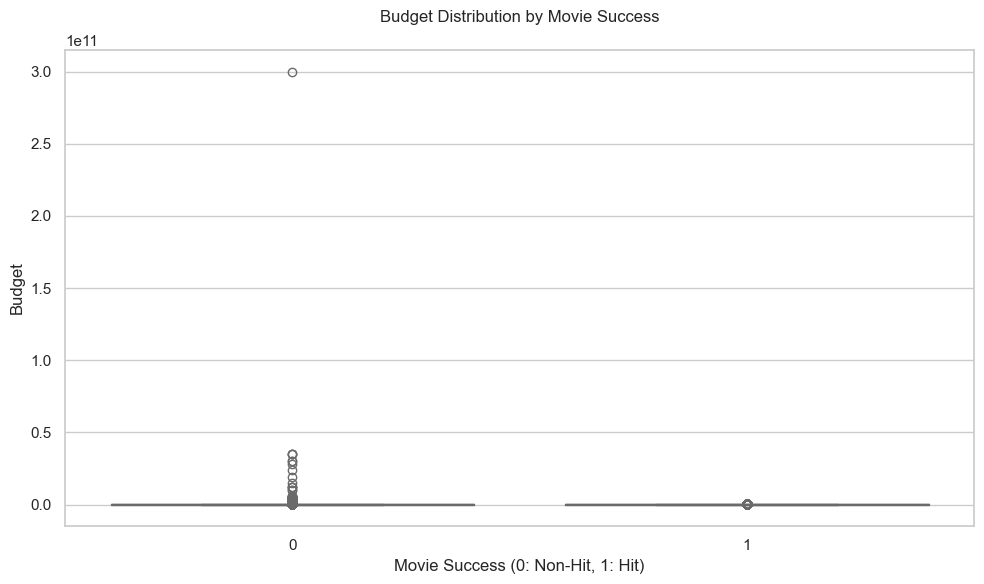

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19380\468060743.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_success.index, y=category_success.values, palette='rocket')


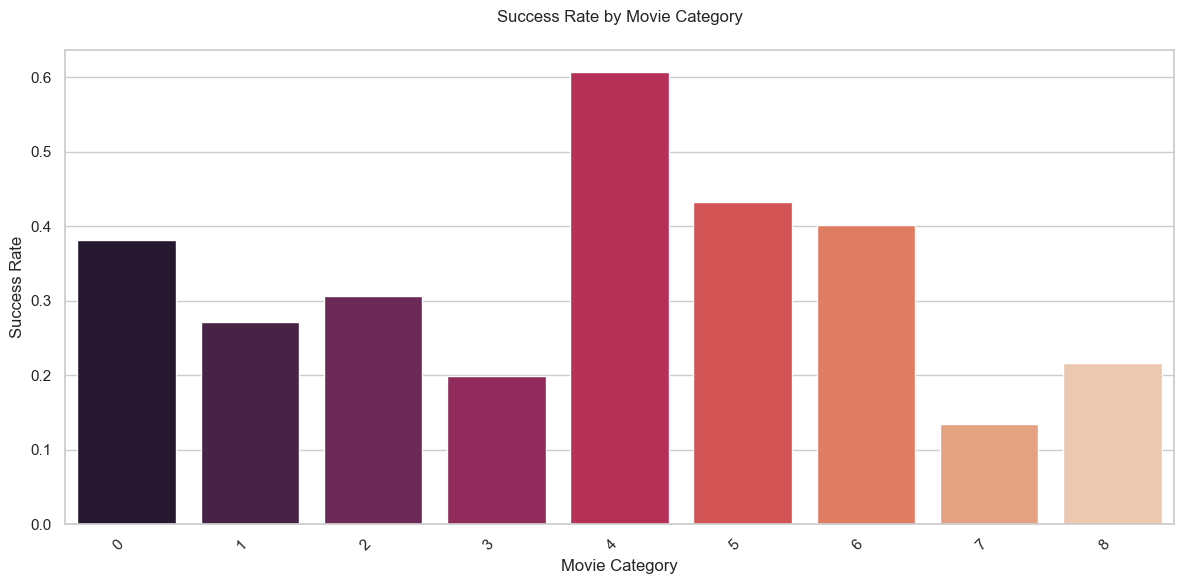

<Figure size 640x480 with 0 Axes>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# seaborn 스타일 설정
sns.set_theme(style="whitegrid")

# 1. 피처 중요도 시각화
plt.figure(figsize=(10, 6))
feat_importance = pd.DataFrame({
    'feature': features,
    'importance': xgb_best.feature_importances_
})
feat_importance = feat_importance.sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feat_importance, palette='viridis')
plt.title('Feature Importance in XGBoost Model', pad=20)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# 2. Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Hit', 'Hit'],
            yticklabels=['Non-Hit', 'Hit'])
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 3. ROC Curve 시각화
y_pred_proba = xgb_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', pad=20)
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# # 4. 예산과 흥행 관계 시각화
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Hit', y='budget', data=df, palette='Set3')
# plt.title('Budget Distribution by Movie Success', pad=20)
# plt.xlabel('Movie Success (0: Non-Hit, 1: Hit)')
# plt.ylabel('Budget')
# plt.tight_layout()
# plt.show()

# # 5. 카테고리별 흥행 비율 시각화
# plt.figure(figsize=(12, 6))
# category_success = df.groupby('Category')['Hit'].mean().sort_values(ascending=False)
# sns.barplot(x=category_success.index, y=category_success.values, palette='rocket')
# plt.xticks(rotation=45, ha='right')
# plt.title('Success Rate by Movie Category', pad=20)
# plt.xlabel('Movie Category')
# plt.ylabel('Success Rate')
# plt.tight_layout()
# plt.show()


### **시각화 기반 인사이트 도출** 📊

**1. 피처 중요도 분석** 🎯
* budget(약 0.3)과 Category(약 0.28)가 가장 중요한 예측 변수
* production_companies가 그 다음으로 중요(약 0.15)
* directors, writers, stars는 상대적으로 낮은 중요도
→ 예산과 카테고리가 흥행 예측의 핵심 요소

**2. 혼동 행렬(Confusion Matrix) 분석** ⚖️
* True Negative(1293): 비흥행 영화를 정확히 예측
* True Positive(395): 흥행 영화를 정확히 예측
* False Positive(254) & False Negative(198): 오분류 사례
→ 비흥행 예측의 정확도가 더 높음

**3. ROC 커브 분석** 📈
* AUC 값이 0.85로 매우 우수한 모델 성능을 보임
* 랜덤 예측(점선) 대비 훨씬 좋은 성능
→ 모델의 예측 신뢰성이 높음을 확인

<br>

#### **📌 최종 인사이트 결론**

**모델 성능 평가**
   * AUC 0.85의 우수한 예측 성능
   * 비흥행 예측이 흥행 예측보다 더 정확
   * 실제 의사결정에 활용 가능한 수준

🔍 **향후 개선 방향**
1. 카테고리별 세부 분석 강화
2. 예산 규모별 성공 패턴 심층 분석
3. 제작사 영향력에 대한 추가 연구
4. 시기별 트렌드 반영 고도화